# Studying changes in global trade between 1993 and 2016
## 1. Setup
### Importing the trade data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_trade = pd.read_pickle('../data/df_trade.pkl')
df_trade.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
11,Afghanistan,Argentina,Maize,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Afghanistan,Argentina,Maize,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Afghanistan,Australia,Apricots,Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def clean_trade(df):
    df_importer = df[df['Element'] == 'Import Quantity']
    df_exporter = df[df['Element'] == 'Export Quantity']
    # Trades as reported by the importing country
    df_importer = df_importer.rename(columns={
        'Reporter Countries': 'Importer',
        'Partner Countries': 'Exporter',
    }).drop(['Element', 'Unit'], axis=1)

    # Trades as reported by the exporting country
    df_exporter = df_exporter.rename(columns={
        'Reporter Countries': 'Exporter',
        'Partner Countries': 'Importer',
    }).drop(['Element', 'Unit'], axis=1)

    # Rename the columns
    cols_i = [name for name in df_importer.columns]
    cols_e = [name for name in df_exporter.columns]
    cols_i[3:] = [col + 'I' for col in cols_i[3:]]
    cols_e[3:] = [col + 'E' for col in cols_e[3:]]
    df_importer.columns = cols_i
    df_exporter.columns = cols_e

    # Merge the dataframes
    df_trades_m = df_importer.merge(df_exporter, how='outer', on=['Importer', 'Exporter', 'Item']).fillna(0)

    # Take the max of both types of reporter
    df_clean_trades = df_trades_m[['Importer', 'Exporter', 'Item']]
    df_importer_reports = df_trades_m[['Y' + str(year) + 'I' for year in range(1993, 2017)]]
    df_importer_reports.columns = [str(year) for year in range(1993, 2017)]
    df_exporter_reports = df_trades_m[['Y' + str(year) + 'E' for year in range(1993, 2017)]]
    df_exporter_reports.columns = [str(year) for year in range(1993, 2017)]
    max_values = df_importer_reports.where(df_importer_reports > df_exporter_reports, df_exporter_reports)
    df_clean_trades[[str(year) for year in range(1993, 2017)]] = max_values
    
    return df_clean_trades

df_trade_q = clean_trade(df_trade[df_trade['Element'].isin(['Import Quantity', 'Export Quantity'])])
df_trade_v = clean_trade(df_trade[df_trade['Element'].isin(['Import Value', 'Export Value'])])

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
df_prod = pd.read_pickle('../data/df_prod.pkl')
df_prod.head()

,Area,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,Afghanistan,"Almonds, with shell",Area harvested,ha,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,12000.0,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,16364.0,16364.0,16364.0,16364.0,16364.0,16364.0,...,26234.0,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0
2,Afghanistan,"Almonds, with shell",Production,tonnes,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,...,31481.0,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,ha,2270.0,2871.0,3000.0,7000.0,4000.0,12000.0,...,28000.0,15000.0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,26019.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,hg/ha,6854.0,6761.0,6667.0,6000.0,6250.0,5917.0,...,6071.0,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0


### Plotting function

In [5]:
def plot_trade(s1, s2, label):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')

    ax1 = s1.plot(label=label+' Weights')
    ax2 = s2.plot(label=label+' Values', secondary_y=True)

    ax1.set_ylabel('tonnes')
    ax2.set_ylabel('1000 US$')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

## 2. Global Trade Volume
We start by looking at the difference in trade volume by looking at the change in imports and exports by weight (in tonnes) and by value (in 1000 US$, adjusted to 2014-2016 value) 

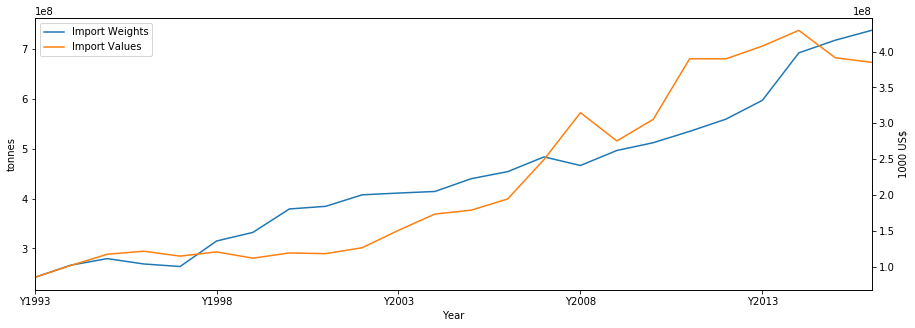

In [6]:
import_w = df_trade[(df_trade['Element'] == 'Import Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
import_v = df_trade[(df_trade['Element'] == 'Import Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(import_w, import_v, 'Import')

Cool. Now exports

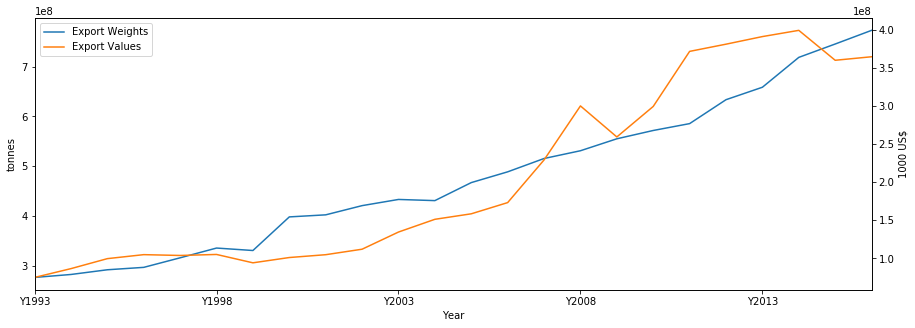

In [9]:
export_w = df_trade[(df_trade['Element'] == 'Export Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
export_v = df_trade[(df_trade['Element'] == 'Export Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(export_w, export_v, 'Export')

We can see some slight disparities between imports and exports. This arises from multiple issues. Let's see the difference.

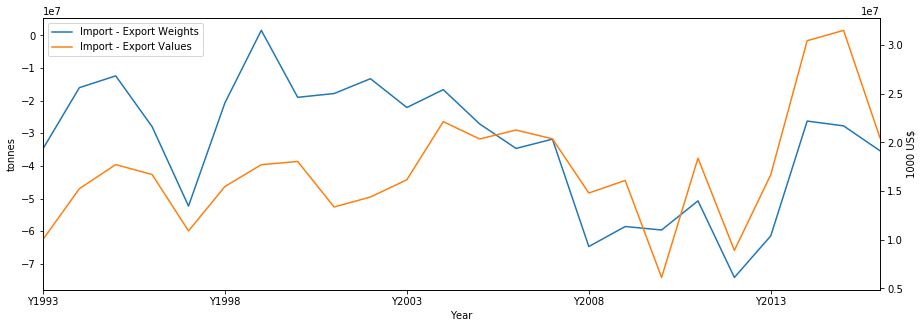

In [8]:
diff_w = import_w - export_w
diff_v = import_v - export_v

plot_trade(diff_w, diff_v, 'Import - Export')

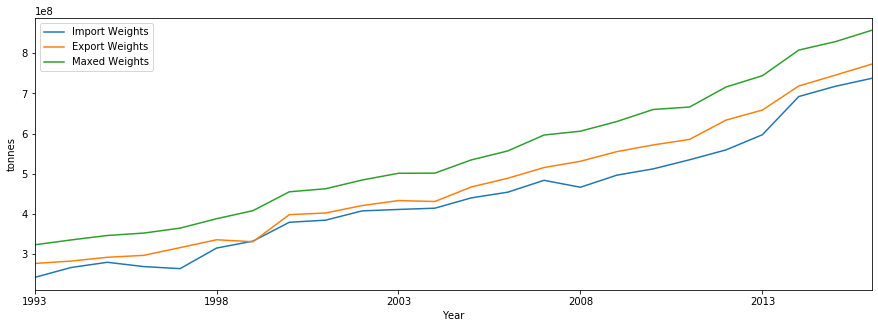

In [12]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('tonnes')
ax1 = import_w.plot(label='Import Weights')
ax2 = export_w.plot(label='Export Weights')
ax3 = df_trade_q[[f'{label}' for label in range(1993, 2017)]].sum(axis=0).plot(label='Maxed Weights')
plt.legend()
plt.show()

We can see that every year, the amount of produce exported is greater than the amount of produce imported, but the value of imported produce is greater than the value of exported produce. Interesting.

## 3. Inter/Intra - Continental Trade Volume
Now we want to see how continents trade with each other. We define for this the following continents

* Africa
* Americas
* Asia
* Europe
* Oceania

I use the FAO's data to seperate the countries in the matrix into continents.

http://www.fao.org/faostat/en/#definitions

In [ ]:
country_groups = pd.read_csv('../data/FAOSTAT_data_11-19-2019.csv')
country_groups.head()

In [ ]:
african_countries = set(country_groups[country_groups['Country Group'] == 'Africa']['Country'])
american_countries = set(country_groups[country_groups['Country Group'] == 'Americas']['Country'])
asian_countries = set(country_groups[country_groups['Country Group'] == 'Asia']['Country'])
european_countries = set(country_groups[country_groups['Country Group'] == 'Europe']['Country'])
oceanian_countries = set(country_groups[country_groups['Country Group'] == 'Oceania']['Country'])

continents = [african_countries, american_countries, asian_countries, european_countries, oceanian_countries]
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

We start by looking at how inter and intra continental has evolved between 1993 and 2016.

In [ ]:
df_intra_continental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intra_continental_imports_v = pd.DataFrame(columns=df_trade.columns)

df_inter_continental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_inter_continental_imports_v = pd.DataFrame(columns=df_trade.columns)

for c in continents:
    df_intra_continental_imports_w = df_intra_continental_imports_w\
        .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                         (df_trade['Partner Countries'].isin(c)) &
                         (df_trade['Element'] == 'Import Quantity')])
    df_intra_continental_imports_v = df_intra_continental_imports_v\
        .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                         (df_trade['Partner Countries'].isin(c)) &
                         (df_trade['Element'] == 'Import Value')])

for c1 in continents:
    for c2 in continents:
        if c1 != c2:
            df_inter_continental_imports_w = df_inter_continental_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_inter_continental_imports_v = df_inter_continental_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_intra_continental_imports_w_sums = df_intra_continental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intra_continental_imports_v_sums = df_intra_continental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_inter_continental_imports_w_sums = df_inter_continental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_inter_continental_imports_v_sums = df_inter_continental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_intra_continental_imports_w_sums, df_intra_continental_imports_v_sums, 'Intra-continental trade')
plot_trade(df_inter_continental_imports_w_sums, df_inter_continental_imports_v_sums, 'Inter-continental trade')

At first glance, their increase looks more or less similar. But these plots are on different scales. We hence look at what proportion of imports were from other continents, compared to the same continent.

In [ ]:
df_total_imports_w_sums = df_intra_continental_imports_w_sums + df_inter_continental_imports_w_sums
df_total_imports_v_sums = df_intra_continental_imports_v_sums + df_inter_continental_imports_v_sums

df_intra_continental_perc_w = df_intra_continental_imports_w_sums/df_total_imports_w_sums
df_intra_continental_perc_v = df_intra_continental_imports_v_sums/df_total_imports_v_sums

plt.figure(figsize=(15,5))
plt.xlabel('Year')
df_intra_continental_perc_w.plot(label='Intracontinental proportion of weight of imports')
df_intra_continental_perc_v.plot(label='Intracontinental proportion of value of imports')
plt.ylim([0.4, 0.6])
plt.grid()
plt.legend()
plt.show()

We notice that despite some fluctuations, and a more stable increase between 2003 and 2016, the proportion of intra and inter continental trade stays quite stable. We now want to look more precisely at regions. Instead of considering continents, we consider the regions:

* Africa
    * Eastern Africa
    * Middle Africa
    * Northern Africa
    * Southern Africa
    * Western Africa
* Americas
    * Northern America
    * Central America
    * Caribbean
    * South America
* Asia
    * Central Asia
    * Eastern Asia
    * Southern Asia
    * South-Eastern Asia
    * Western Asia
* Europe
    * Eastern Europe
    * Northern Europe
    * Southern Europe
    * Western Europe
* Oceania
    * Australia and New Zealand
    * Melanesia
    * Polynesia

In [ ]:
region_names = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
                'Northern America', 'Central America', 'Caribbean', 'South America',
                'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe',
                'Australia and New Zealand', 'Melanesia', 'Polynesia']
regions = [set(country_groups[country_groups['Country Group'] == region]['Country']) for region in region_names]

In [ ]:
df_intra_regional_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intra_regional_imports_v = pd.DataFrame(columns=df_trade.columns)

df_inter_regional_imports_w = pd.DataFrame(columns=df_trade.columns)
df_inter_regional_imports_v = pd.DataFrame(columns=df_trade.columns)


for c in regions:
    df_intra_regional_imports_w = df_intra_regional_imports_w\
                                    .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                                                     (df_trade['Partner Countries'].isin(c)) &
                                                     (df_trade['Element'] == 'Import Quantity')])
    df_intra_regional_imports_v = df_intra_regional_imports_v\
                                    .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                                                     (df_trade['Partner Countries'].isin(c)) &
                                                     (df_trade['Element'] == 'Import Value')])

for c1 in regions:
    for c2 in regions:
        if c1 != c2:
            df_inter_regional_imports_w = df_inter_regional_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_inter_regional_imports_v = df_inter_regional_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_intra_regional_imports_w_sums = df_intra_regional_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intra_regional_imports_v_sums = df_intra_regional_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_inter_regional_imports_w_sums = df_inter_regional_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_inter_regional_imports_v_sums = df_inter_regional_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_intra_regional_imports_w_sums, df_intra_regional_imports_v_sums, 'Intra-Regional trade')
plot_trade(df_inter_regional_imports_w_sums, df_inter_regional_imports_v_sums, 'Inter-Regional trade')

In [ ]:
df_total_imports_w = df_intra_regional_imports_w_sums + df_inter_regional_imports_w_sums
df_total_imports_v = df_intra_regional_imports_v_sums + df_inter_regional_imports_v_sums

df_intra_regional_perc_w = df_intra_regional_imports_w_sums/df_total_imports_w
df_intra_regional_perc_v = df_intra_regional_imports_v_sums/df_total_imports_v

plt.figure(figsize=(15,5))
plt.xlabel('Year')
df_intra_regional_perc_w.plot(label='Intra-Regional proportion of weight of imports')
df_intra_regional_perc_v.plot(label='Intra-Regional proportion of value of imports')
plt.ylim([0.1, 0.3])
plt.grid()
plt.legend()
plt.show()

We can see that there seems to be a slow decrease in the proportion of trade that is done between countries in the same region, that started around 2008.

## 4 Looking at Specific Items

What items show the most change in how they are traded?

We only look at the 100 items that are the most traded.

In [ ]:
popular_items = df_trade.groupby('Item').sum().sort_values(by='Y2016', ascending=False)[:100]
popular_items.head()

In [ ]:
items_kept = list(popular_items.index)

def change_sort(item):
    row = item[1]
    if row.isnull().values.any():
        return 0
    else:
        return np.abs(row['Y1993'] - row['Y2016'])

df_item_intra_regional_w = df_intra_regional_imports_w[df_intra_regional_imports_w['Item'].isin(items_kept)]\
                            [['Item'] + [f'Y{label}' for label in range(1993, 2017)]].groupby('Item').sum()
df_item_intra_regional_v = df_intra_regional_imports_v[df_intra_regional_imports_v['Item'].isin(items_kept)]\
                            [['Item'] + [f'Y{label}' for label in range(1993, 2017)]].groupby('Item').sum()

df_item_inter_regional_w = df_inter_regional_imports_w[df_inter_regional_imports_w['Item'].isin(items_kept)]\
                            [['Item'] + [f'Y{label}' for label in range(1993, 2017)]].groupby('Item').sum()
df_item_inter_regional_v = df_inter_regional_imports_v[df_inter_regional_imports_v['Item'].isin(items_kept)]\
                            [['Item'] + [f'Y{label}' for label in range(1993, 2017)]].groupby('Item').sum()

df_item_imports_w = df_item_intra_regional_w + df_item_inter_regional_w
df_item_imports_v = df_item_intra_regional_v + df_item_inter_regional_v

df_item_intra_regional_perc_w = df_item_intra_regional_w/df_item_imports_w
df_item_intra_regional_perc_v = df_item_intra_regional_v/df_item_imports_v

item_intra_regional_perc_w = []
for index, row in df_item_intra_regional_perc_w.iterrows():
    item_intra_regional_perc_w.append((
        row.name,
        row
    ))

item_intra_regional_perc_v = []
for index, row in df_item_intra_regional_perc_v.iterrows():
    item_intra_regional_perc_v.append((
        row.name,
        row
    ))

item_intra_regional_perc_w.sort(key=change_sort, reverse=True)
item_intra_regional_perc_v.sort(key=change_sort, reverse=True)

plt.figure(figsize=(15,5))
plt.xlabel('Year')
for name, row in item_intra_regional_perc_w[:5]:
    row.plot(label=name)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Year')
for name, row in item_intra_regional_perc_v[:5]:
    row.plot(label=name)
plt.grid()
plt.legend()
plt.show()

In [ ]:
quinoa_exports_w = df_trade[(df_trade['Item'] == 'Quinoa') & (df_trade['Element'] == 'Export Quantity')]
quinoa_imports_w = df_trade[(df_trade['Item'] == 'Quinoa') & (df_trade['Element'] == 'Import Quantity')]
quinoa_imports_w.head()

In [ ]:
quinoa_exports_sum = quinoa_exports_w[[f'Y{label}' for label in range(1993, 2017)]].sum()
quinoa_imports_sum = quinoa_imports_w[[f'Y{label}' for label in range(1993, 2017)]].sum()

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
quinoa_exports_sum.plot(label='Quinoa Exports')
quinoa_imports_sum.plot(label='Quinoa Imports')
plt.grid()
plt.legend()
plt.show()

Fruit, tropical fresh nes:

FRUIT, FRESH NES Including inter alia: azarole (Crataegus azarolus); babaco (Carica pentagona); elderberry (Sambucus nigra); jujube (Zizyphus jujuba); litchi (Nephelium litchi); loquat (Eriobotrya japonica); medlar (Mespilus germanica); pawpaw (Asimina triloba); pomegranate (Punica granatum); prickly pear (Opuntia ficus-indica); rose hips (Rosa spp.); rowanberry (Sorbus aucuparia); service-apple (Sorbus domestica); tamarind (Tamarindus indica); tree-strawberry (Arbutus unedo)

Other fresh fruit that are not identified separately because of their minor relevance at the international level. Because of their limited local importance, some countries report fresh fruit under this heading that are classified separately by FAO.

http://www.fao.org/waicent/faoinfo/economic/faodef/fdef08e.htm#8.08

## 5 China and Imports

What are China's biggest trade partners, and how are they changing?

In [ ]:
print(list(df_trade['Reporter Countries'].value_counts().index))

In [ ]:
china_names = ['China, mainland', 'China, Hong Kong SAR', 'China, Taiwan Province of', 'China, Macao SAR']

df_china_trade_w = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Quantity')]
df_china_trade_v = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Value')]

### 5.1 The Evolution of Chinese Imports

We start by looking at how Chinese imports changed over the past 20 years.

In [ ]:
china_trades_w = df_china_trade_w[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
china_trades_v = df_china_trade_v[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(china_trades_w, china_trades_v, 'Chinese Imports')

Unsurprisingly, Chinese imports have greatly increased in the past 20 years

### 5.2 Trades with each continent

First, let's look at how much trade China does with countries on each continent

In [ ]:
def sort_stuf(a):
    return a[1]['Y2016']


def group_trades(trade_df, sets_of_partners):
    """
    trade_df: the df to use
    sets_of_partners: list of sets of countries, with names
    """
    country_trades = []
    for name, countries in sets_of_partners:
        country_trades.append((
            name,
            trade_df[(trade_df['Partner Countries'].isin(countries))][
                    [f'Y{label}' for label in range(1993, 2017)]
                ].sum(axis=0)
        ))
    return country_trades
    

def plot_results(trade_sets, unit):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')
    plt.ylabel(f'Exports to China [{unit}]')
    for name, trades in trade_sets:
        trades_with_country = trades
        # Plot total trades
        trades_with_country.plot(label=f'Trade with {name}')

    plt.grid()
    plt.legend()
    plt.show()
    

def plot_partners(sets_of_partners, n):
    """
    sets_of_partners: list of sets of countries, with names
    n: the number of sets of countries to be plotted, the most important will be ploted
    """
    china_country_trades_w = group_trades(df_china_trade_w, sets_of_partners)
    china_country_trades_v = group_trades(df_china_trade_v, sets_of_partners)
    
    china_country_trades_w.sort(key=sort_stuf, reverse=True)
    china_country_trades_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(china_country_trades_w[:n], 'tonnes')
    plot_results(china_country_trades_v[:n], 'US$, in Millions')
    
    trade_proportion_w = [(name, weights/china_trades_w) for (name, weights) in china_country_trades_w]
    trade_proportion_v = [(name, weights/china_trades_v) for (name, weights) in china_country_trades_v]

    trade_proportion_w.sort(key=sort_stuf, reverse=True)
    trade_proportion_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(trade_proportion_w[:n], '% of total volume')
    plot_results(trade_proportion_v[:n], '% of total value')

In [ ]:
p = [(c_name, c) for (c_name, c) in zip(continent_names, continents)]
plot_partners(p, 5)

We can see that the American continent is China's main agricultural trade partner. In terms of proportion of total value, there has been an increase from between 50% and 60% in the 90s to around 70% in the 2010s.  Interestingly, trade with Asian countries has gone from around 30% of its total value in 1993 to around 13% in 2016.

### 5.3 Regions

We refine our search to which regions are most import to China.

In [ ]:
p = [(c_name, c) for (c_name, c) in zip(region_names, regions)]
plot_partners(p, 5)

South America has gone from a tiny playa in the 90s to one of the two main partners in 2016.


### 5.4 Countries

In [ ]:
all_countries = african_countries.union(american_countries)\
                                    .union(asian_countries)\
                                    .union(european_countries)\
                                    .union(oceanian_countries)

p = [(c, {c}) for c in all_countries]
plot_partners(p, 5)